In [1]:
import numpy as np 
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import time

The $SABA_{2}Y4$ intergrator of the Henon-Heiles Hamiltonian - we employ this to compute the maximal Lyapunov characteristic exponents (mLCE).

In [2]:
# is there a way of updating the Hamiltonian
#for the Hamiltonian of assignment 1
start_time  = time.time()
#initialize vectors 
N = 2000
a = 0
b = 2500
h = 0.05 #(b-a)/N
H = 1/8                            #the total energy of the system

In [3]:
#initializing vectors
x_a0 = np.zeros(N, dtype='float')
y_a0 = np.zeros(N, dtype='float')
x_d1a1 = np.zeros(N, dtype='float')
y_d1a1 = np.zeros(N, dtype='float')
px_d1b1 = np.zeros(N, dtype='float')
py_d1b1 = np.zeros(N, dtype='float')
x_d1a2 = np.zeros(N, dtype='float')
y_d1a2 = np.zeros(N, dtype='float')
px_d0b1 = np.zeros(N, dtype='float')
py_d0b1 = np.zeros(N, dtype='float')
x_d0a2 = np.zeros(N, dtype='float')
y_d0a2 = np.zeros(N, dtype='float')
H_new = np.zeros(N, dtype='float')
end_time  = np.zeros(N, dtype='float')

In [4]:
#initializing vectors deviation vectors
dx_a0 = np.zeros(N, dtype='float')
dy_a0 = np.zeros(N, dtype='float')
dx_d1a1 = np.zeros(N, dtype='float')
dy_d1a1 = np.zeros(N, dtype='float')
dpx_d1b1 = np.zeros(N, dtype='float')
dpy_d1b1 = np.zeros(N, dtype='float')
dx_d1a2 = np.zeros(N, dtype='float')
dy_d1a2 = np.zeros(N, dtype='float')
dpx_d0b1 = np.zeros(N, dtype='float')
dpy_d0b1 = np.zeros(N, dtype='float')
dx_d0a2 = np.zeros(N, dtype='float')
dy_d0a2 = np.zeros(N, dtype='float')

In [5]:
#funtion to return the norm of the deviation vectors
def alpha(dx, dy, dpx, dpy):
    return np.linalg.norm([dx, dy, dpx, dpy])

In [19]:
#set initial conditions 
y_vals = [ -0.25]
x0 = 0
py0 = 0
#defint dunction to find px0
def initial_px(x0, y0, py0):
    return np.sqrt(2*H - py0**2  - y0**2 - 2*x0**2*y0 + (2/3)*y0**2)


#intial deviation vectors 
dx0 = 10
dy0 = 0
dpx0 = 0
dpy0 = 0
#set constants for the SABA integrator
a1 = 1/2 - 1/(2*np.sqrt(3))
a2 = 1/np.sqrt(3)
b1 = 1/2
d0 = - (2**(1/3))/(2 - 2**(1/3))
d1 = 1/(2 - 2**(1/3))
a0 = d1*a1 + d0*a1

In [20]:
LCE = np.zeros(N, dtype = 'float')

/Users/realeboga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in double_scalars
/Users/realeboga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in double_scalars
/Users/realeboga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars
/Users/realeboga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


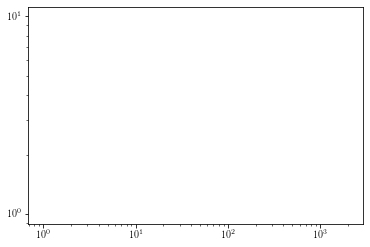

In [21]:
#propagate the initial conditions forward
#via successive canonical transformations
i = 0
error1 = np.zeros(N)
for val in y_vals:
    y0 = val
    px0 = initial_px(x0, y0, py0)
    for i in range(N-1):
        #propage the intial conditions over one time step
        x_d1a1[0] = x0 + d1*a1*h*px0
        y_d1a1[0] = y0 + d1*a1*h*py0
        px_d1b1[0] = px0 - d1*b1*h*(x0 + 2*x0*y0)
        py_d1b1[0] = py0 - d1*b1*h*(y0 + x0**2 + y0**2)
    
        dx_d1a1[0] = dx0 + d1*a1*h*dpx0
        dy_d1a1[0] = dy0 + d1*a1*h*dpy0
        dpx_d1b1[0] = dpx0 - d1*b1*h*((1 + 2*y_d1a1[0])*dx_d1a1[0] + 2*x_d1a1[0])
        dpy_d1b1[0] = dpy0 + d1*b1*h*(-2*x_d1a1[0] + (-1 + 2*y_d1a1[0])*dy_d1a1[0])
        #H_new[0] = (1/2)*(x_a1[0]**2 + y_a1[0]**2) + (1/2)*(px_half[0]**2 + py_half[0]**2) +(x_a1[0]**2)*y_a1[0] - (1/3)*y_a1[0]**3
        #compute first error term 
        #propagate forward for all time steps
        x_d1a2[i] = x_d1a1[i] + d1*a2*h*px_d1b1[i]
        y_d1a2[i] = y_d1a1[i] + d1*a2*h*py_d1b1[i]
        px_d1b1[i+1] = px_d1b1[i] - d1*b1*h*(x_d1a2[i] + 2*x_d1a2[i]*y_d1a2[i])
        py_d1b1[i+1] = py_d1b1[i] - d1*b1*h*(y_d1a2[i] + x_d1a2[i]**2 - y_d1a2[i]**2)
    
        dx_d1a2[i] = dx_d1a1[i] + d1*a2*h*dpx_d1b1[i]
        dy_d1a2[i] = dy_d1a1[i] + d1*a2*h*dpy_d1b1[i]
        dpx_d1b1[i+1] = dpx_d1b1[i] - d1*b1*h*(((1 + 2*y_d1a2[i])*dx_d1a2[i] + 2*x_d1a2[i]))
        dpy_d1b1[i+1] = dpy_d1b1[i] + d1*b1*h*(-2*x_d1a2[i] + (-1 + 2*y_d1a2[i])*dy_d1a2[i])
     
        x_a0[i] = x_d1a2[i]  + a0*h*px_d1b1[i+1]
        y_a0[i] = y_d1a2[i] + a0*h*py_d1b1[i+1]
        dx_a0[i] = dx_d1a2[i]  + a0*h*dpx_d1b1[i+1]
        dy_a0[i] = dy_d1a2[i] + a0*h*dpy_d1b1[i+1]

        px_d0b1[i+1] = px_d1b1[i+1] - d0*b1*h*(x_a0[i] + 2*x_a0[i]*y_a0[i])
        py_d0b1[i+1] = py_d1b1[i+1] - d0*b1*h*(y_a0[i] + x_a0[i]**2 - y_a0[i]**2)
        dpx_d0b1[i+1] = dpx_d1b1[i] - d0*b1*h*(((1 + 2*y_a0[i])*dx_a0[i] + 2*x_a0[i]))
        dpy_d0b1[i+1] = dpy_d1b1[i] + d0*b1*h*(-2*x_a0[i] + (-1 + 2*y_a0[i])*dy_a0[i])
     
        x_d0a2[i] = x_a0[i] + d0*a2*h*px_d0b1[i+1]
        y_d0a2[i] = y_a0[i] + d0*a2*h*py_d0b1[i+1]
        dx_d0a2[i] = dx_a0[i] + d0*a2*h*dpx_d0b1[i+1]
        dy_d0a2[i] = dy_a0[i] + d0*a2*h*dpy_d0b1[i+1]

        px_d0b1[i+1] = px_d0b1[i+1] - d0*b1*h*(x_d0a2[i+1] + 2*x_d0a2[i+1]*y_d0a2[i+1])
        py_d0b1[i+1] = py_d0b1[i+1] - d0*b1*h*(y_d0a2[i+1] + x_d0a2[i+1]**2 - y_d0a2[i+1]**2)
        dpx_d0b1[i+1] = dpx_d0b1[i+1] - d0*b1*h*(((1 + 2*y_d0a2[i])*dx_d1a2[i] + 2*x_d0a2[i]))
        dpy_d0b1[i+1] = dpy_d0b1[i+1] + d0*b1*h*(-2*x_d0a2[i] + (-1 + 2*y_d0a2[i])*dy_d0a2[i])
     
        x_a0[i+1] = x_d0a2[i]  + a0*h*px_d0b1[i+1]
        y_a0[i+1] = y_d0a2[i] + a0*h*py_d0b1[i+1]
        dx_a0[i+1] = dx_d0a2[i]  + a0*h*dpx_d0b1[i+1]
        dy_a0[i+1] = dy_d0a2[i] + a0*h*dpy_d0b1[i+1]
    
        px_d1b1[i+1] = px_d0b1[i+1] - d1*b1*h*(x_a0[i+1] + 2*x_a0[i+1]*y_a0[i+1])
        py_d1b1[i+1] = py_d0b1[i+1] - d1*b1*h*(y_a0[i+1] + x_a0[i+1]**2 - y_a0[i+1]**2)
        dpx_d0b1[i+1] = dpx_d1b1[i+1] - d0*b1*h*(((1 + 2*y_a0[i+1])*dx_a0[i+1] + 2*x_a0[i+1]))
        dpy_d0b1[i+1] = dpy_d1b1[i+1] + d0*b1*h*(-2*x_a0[i+1] + (-1 + 2*y_a0[i+1])*dy_a0[i+1])
     
        x_d1a2[i+1] = x_a0[i+1] + d1*a2*h*px_d1b1[i+1]
        y_d1a2[i+1] = y_a0[i+1] + d1*a2*h*py_d1b1[i+1]    
        dx_d1a2[i+1] = dx_d1a1[i+1] + d1*a2*h*dpx_d1b1[i+1]
        dy_d1a2[i+1] = dy_d1a1[i+1] + d1*a2*h*dpy_d1b1[i+1]
    
        px_d1b1[i+1] = px_d1b1[i+1] - d1*b1*h*(x_d1a2[i+1] + 2*x_d1a2[i+1]*y_d1a2[i+1])
        py_d1b1[i+1] = py_d1b1[i+1] - d1*b1*h*(y_d1a2[i+1] + x_d1a2[i+1]**2 - y_d1a2[i+1]**2)
        dpx_d1b1[i+1] = dpx_d1b1[i+1] - d1*b1*h*(((1 + 2*y_d1a2[i+1])*dx_d1a2[i+1] + 2*x_d1a2[i+1]))
        dpy_d1b1[i+1] = dpy_d1b1[i+1] + d1*b1*h*(-2*x_d1a2[i+1] + (-1 + 2*y_d1a2[i+1])*dy_d1a2[i+1])
     
        x_d1a1[i+1] = x_d1a2[i+1] + d1*a1*h*px_d1b1[i+1]
        y_d1a1[i+1] = y_d1a2[i+1] + d1*a1*h*py_d1b1[i+1]
        dx_d1a1[i+1] = dx_d1a2[i+1] + d1*a1*h*dpx_d1b1[i+1]
        dy_d1a1[i+1] = dy_d1a2[i+1] + d1*a1*h*dpy_d1b1[i+1] 
        #calculate the total energy
        H_new[i] = (1/2)*(px_d1b1[i]**2 + py_d1b1[i]**2) + (1/2)*(x_d1a1[i]**2 + y_d1a1[i]**2) +(x_d1a1[i]**2)*y_d1a1[i] - (1/3)*y_d1a1[i]**3
        error1[i] = abs((H - H_new[i])/H)
        #calculate the CPU time
        end_time[i] = time.time() - start_time
        '''
        #handle the compputation of the mLCE
        for idx in range(1, i+1):
                if i == 0:
                    LCE[i] = (1/(h))*np.sum(np.log(np.linalg.norm([dx_d1a1[idx], dy_d1a1[idx], dpx_d1b1[idx], dpy_d1b1[idx]])))
                    lyapunov = (1/(h))*np.sum(np.log(np.linalg.norm([dx_d1a1[idx], dy_d1a1[idx], dpx_d1b1[idx], dpy_d1b1[idx]])))
                else:
                    LCE[i] = (1/(i*h))*np.sum(np.log(np.linalg.norm([dx_d1a1[idx], dy_d1a1[idx], dpx_d1b1[idx], dpy_d1b1[idx]])))
                lyapunov = (1/(i*h))*np.sum(np.log(np.linalg.norm([dx_d1a1[idx], dy_d1a1[idx], dpx_d1b1[idx], dpy_d1b1[idx]])))
        #renormalize the deviation vectors
        dx_d1a1[i+1] = dx_d1a1[i+1]/alpha(dx_d1a1[i+1], dy_d1a1[i+1], dpx_d1b1[i+1], dpy_d1b1[i+1])
        dy_d1a1[i+1] = dy_d1a1[i+1]/alpha(dx_d1a1[i+1], dy_d1a1[i+1], dpx_d1b1[i+1], dpy_d1b1[i+1])
        dx_d1a2[i+1] = dx_d1a2[i+1]/alpha(dx_a0[i+1], dy_a0[i+1], dpx_d1b1[i+1], dpy_d1b1[i+1])
        dy_d1a2[i+1] = dy_d1a2[i+1]/alpha(dx_a0[i+1], dy_a0[i+1], dpx_d1b1[i+1], dpy_d1b1[i+1])
        dx_d0a2[i+1] = dx_d0a2[i+1]/alpha(dx_a0[i+1], dy_a0[i+1], dpx_d0b1[i+1], dpy_d0b1[i+1])
        dy_d0a2[i+1] = dy_d0a2[i+1]/alpha(dx_a0[i+1], dy_a0[i+1], dpx_d0b1[i+1], dpy_d0b1[i+1])
        dx_a0[i+1] = dx_a0[i+1]/alpha(dx_d0a2[i+1], dy_d0a2[i+1], dpx_d0b1[i+1], dpy_d0b1[i+1])
        dy_a0[i+1] = dy_a0[i+1]/alpha(dx_d0a2[i+1], dy_d0a2[i+1], dpx_d0b1[i+1], dpy_d0b1[i+1])
        dpx_d0b1[i+1] = dpx_d0b1[i+1]/alpha(dx_a0[i+1], dy_a0[i+1], dpx_d1b1[i+1], dpy_d1b1[i+1])
        dpy_d1b1[i+1] = dpy_d1b1[i+1]/alpha(dx_a0[i+1], dy_a0[i+1], dpx_d1b1[i+1], dpy_d1b1[i+1])
        dpx_d1b1[i+1] = dpx_d1b1[i+1]/alpha(dx_d1a2[i+1], dy_d1a2[i+1], dpx_d1b1[i+1], dpy_d1b1[i+1])
        dpy_d1b1[i+1] = dpy_d1b1[i+1]/alpha(dx_d1a2[i+1], dy_d1a2[i+1], dpx_d1b1[i+1], dpy_d1b1[i+1])
        '''
        i+=1
    plt.loglog(np.linspace(0, N, N), LCE)

In [9]:
lyapunov

NameError: name 'lyapunov' is not defined

End time for H1:  37.46742510795593


Text(0, 0.5, 'py')

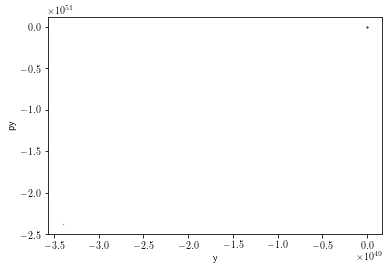

In [15]:
#end_time = time.time() - start_time
print('End time for H1: ', time.time() - start_time)
plt.scatter(y_d1a1, py_d1b1, s=0.1)
plt.xlabel('y')
plt.ylabel('py')

Text(0, 0.5, 'px')

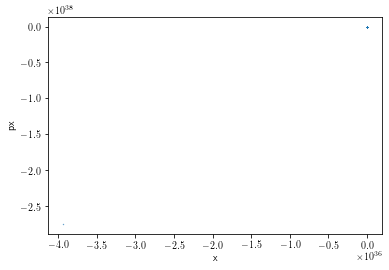

In [22]:
plt.scatter(x_d1a1, px_d1b1, s=0.1)
plt.xlabel('x')
plt.ylabel('px')

Text(0, 0.5, 'y')

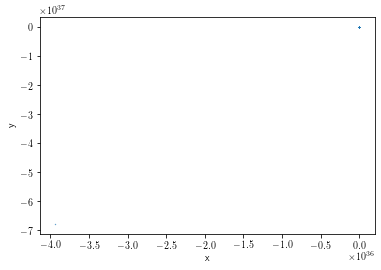

In [23]:
plt.scatter(x_d1a1, y_d1a1,marker='o',  s=0.1)
plt.xlabel('x')
plt.ylabel('y')

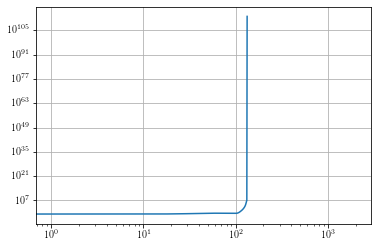

In [24]:
#plt.loglog(np.linspace(0,N, N), Energy)
plt.loglog(np.linspace(0,N, N), H_new)
plt.grid()
#plt.plot(np.log(end_time),np.log(error1))
